In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-03-01 11:05:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.200.240, 172.217.24.16, 172.217.27.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.200.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  1.82MB/s    in 28s     

2021-03-01 11:06:13 (2.34 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os 
import zipfile 
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r') 

zip_ref.extractall('/tmp') 
zip_ref.close() 

In [3]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.483.jpg', 'cat.642.jpg', 'cat.892.jpg', 'cat.4.jpg', 'cat.648.jpg', 'cat.256.jpg', 'cat.899.jpg', 'cat.767.jpg', 'cat.500.jpg', 'cat.293.jpg']
['dog.809.jpg', 'dog.157.jpg', 'dog.742.jpg', 'dog.786.jpg', 'dog.561.jpg', 'dog.580.jpg', 'dog.870.jpg', 'dog.799.jpg', 'dog.695.jpg', 'dog.211.jpg']


In [6]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

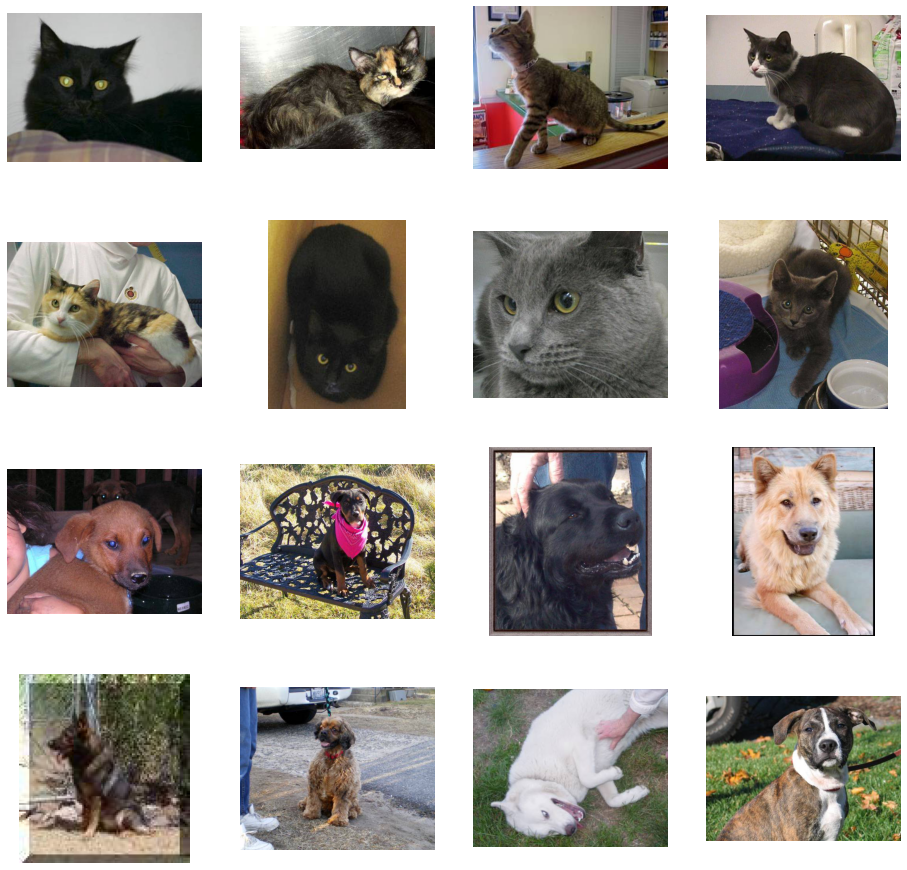

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [10]:
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # flatten the results to feed into a DNN 
    tf.keras.layers.Flatten(),
    #512 neuron hidden layer 
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') 
])

/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-pack

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [14]:
from tensorflow.keras.optimizers import RMSprop 
model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['acc']) 


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen=ImageDataGenerator(rescale=1.0/255)
test_datagen=ImageDataGenerator(rescale=1.0/255) 

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                     class_mode='binary',
                                                     target_size=(150,150)) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history=model.fit_generator(train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=100,
                           epochs=15,
                           validation_steps=50,
                           verbose=2) 

Epoch 1/15
50/50 [==============================] - 3s 53ms/step - loss: 0.6632 - acc: 0.6070: 1s - loss: 0.6
 - 9s - loss: 0.8696 - acc: 0.5525 - val_loss: 0.6632 - val_acc: 0.6070
Epoch 2/15
50/50 [==============================] - 3s 54ms/step - loss: 0.6229 - acc: 0.6660
 - 7s - loss: 0.6328 - acc: 0.6545 - val_loss: 0.6229 - val_acc: 0.6660
Epoch 3/15
50/50 [==============================] - 3s 53ms/step - loss: 0.5754 - acc: 0.6880
 - 7s - loss: 0.5625 - acc: 0.7280 - val_loss: 0.5754 - val_acc: 0.6880
Epoch 4/15
50/50 [==============================] - 3s 52ms/step - loss: 0.5734 - acc: 0.7130
 - 7s - loss: 0.4899 - acc: 0.7570 - val_loss: 0.5734 - val_acc: 0.7130
Epoch 5/15
50/50 [==============================] - 3s 55ms/step - loss: 0.5838 - acc: 0.7120
 - 7s - loss: 0.4146 - acc: 0.8025 - val_loss: 0.5838 - val_acc: 0.7120
Epoch 6/15
50/50 [==============================] - 3s 53ms/step - loss: 0.8465 - acc: 0.6670
 - 7s - loss: 0.3335 - acc: 0.8530 - val_loss: 0.8465 - val_

In [23]:
import numpy as np 
from keras.preprocessing import image 

for filename in os.listdir('./data_cat_dog/'):
    path=os.getcwd()+'/data_pic/'+filename
    img=image.load_img(path,target_size=(150,150)) 
    x=image.img_to_array(img) 
    x=np.expand_dims(x,axis=0) 
    images=np.vstack([x]) 
    classes=model.predict(images,batch_size=10) 
    print(classes[0]) 
    if classes[0]>0:
        print(path+" is a dog ")
    else:
        print(path+" is a cat")

In [24]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

NameError: name 'layer_names' is not defined